### 0. Title & Learning Objectives

**Intro to Supervised Machine Learning: Decision Trees + Workflow**

- Define supervised learning and its key pieces (features, labels, training).
- Explain classification vs regression.
- Describe decision trees and how they make decisions.
- Implement a decision tree in scikit-learn.
- Correctly do train/val/test splits and evaluate a simple model.
- Know how to run a notebook/script on HiPerGator.


### 1. What is Supervised Learning?

Supervised learning pairs labeled examples with an algorithm that learns how to map inputs to outputs. Once trained, the model can make predictions on new, unseen data.

**Key pieces**

- `dataset`: collection of examples we care about.
- `features (X)`: measurable inputs like heart rate, pixels, or number of people on each track.
- `labels (y)`: correct answers provided by humans, instruments, or previous experiments.
- `model`: algorithm (decision tree, neural net, etc.) that learns a mapping from features to labels.
- `training`: adjusting the model based on data so predictions get closer to true labels.
- `prediction`: model’s guess for new examples after training.

**Classification vs. regression**

- Classification predicts categories (e.g., "tumor is benign or malignant").
- Regression predicts continuous numbers (e.g., blood glucose level in mg/dL).

**The feedback loop**
Data → Model → Predictions → Compare to Labels → Learn → Repeat

**Check-your-understanding**

1. What makes learning “supervised”?
2. Is predicting blood glucose level classification or regression?


### 2. The Trolley Example (Decision Making as a Tree)

Imagine a simplified trolley scenario where an operator must choose between Track A and Track B. Rather than debating ethics, we will treat it as a structured decision problem to understand decision trees.

We can frame it as supervised learning:

- **Inputs/features**: number of people on Track A/B, whether a child or doctor is present, whether there is a hazard.
- **Output/label**: choose Track A (`"A"`) or Track B (`"B"`).
- This dataset is purely synthetic, meant to teach how trees work—not to serve as moral authority.


![Trolley cart decision scenario illustration](../../files/trolly-cart.webp)

_Figure: Toy trolley cart image used in the decision tree example._


The trolley cart example frames a supervised learning task where each scenario maps measurable inputs to a track choice. Key inputs to the model are:

- `track_a_people`: the number of people who would be impacted if the trolley goes down Track A.
- `track_b_people`: the number of people who would be impacted if the trolley goes down Track B.
- `has_child_on_b`: binary indicator of whether a child is present on Track B.
- `has_doctor_on_a`: binary indicator of whether a doctor is present on Track A.
- `hazard_on_a`: binary flag indicating a hazard on Track A.
- `choice`: the label showing whether the synthetic operator selected Track A or Track B.

These features feed the decision tree, which learns splits that best separate the `choice` outcomes based on those human-readable attributes.


In [1]:
import pandas as pd

trolley_data = [
    {
        "scenario_id": 1,
        "track_a_people": 1,
        "track_b_people": 3,
        "has_child_on_b": 1,
        "has_doctor_on_a": 0,
        "hazard_on_a": 0,
        "choice": "A"
    },
    {
        "scenario_id": 2,
        "track_a_people": 4,
        "track_b_people": 1,
        "has_child_on_b": 0,
        "has_doctor_on_a": 1,
        "hazard_on_a": 1,
        "choice": "B"
    },
    {
        "scenario_id": 3,
        "track_a_people": 2,
        "track_b_people": 2,
        "has_child_on_b": 1,
        "has_doctor_on_a": 0,
        "hazard_on_a": 0,
        "choice": "A"
    },
    {
        "scenario_id": 4,
        "track_a_people": 3,
        "track_b_people": 5,
        "has_child_on_b": 0,
        "has_doctor_on_a": 0,
        "hazard_on_a": 0,
        "choice": "A"
    },
    {
        "scenario_id": 5,
        "track_a_people": 2,
        "track_b_people": 4,
        "has_child_on_b": 0,
        "has_doctor_on_a": 1,
        "hazard_on_a": 0,
        "choice": "A"
    },
    {
        "scenario_id": 6,
        "track_a_people": 5,
        "track_b_people": 3,
        "has_child_on_b": 0,
        "has_doctor_on_a": 1,
        "hazard_on_a": 0,
        "choice": "B"
    },
    {
        "scenario_id": 7,
        "track_a_people": 1,
        "track_b_people": 1,
        "has_child_on_b": 0,
        "has_doctor_on_a": 0,
        "hazard_on_a": 0,
        "choice": "B"
    },
    {
        "scenario_id": 8,
        "track_a_people": 3,
        "track_b_people": 3,
        "has_child_on_b": 1,
        "has_doctor_on_a": 0,
        "hazard_on_a": 0,
        "choice": "A"
    },
    {
        "scenario_id": 9,
        "track_a_people": 2,
        "track_b_people": 5,
        "has_child_on_b": 0,
        "has_doctor_on_a": 1,
        "hazard_on_a": 0,
        "choice": "A"
    },
    {
        "scenario_id": 10,
        "track_a_people": 6,
        "track_b_people": 2,
        "has_child_on_b": 0,
        "has_doctor_on_a": 0,
        "hazard_on_a": 1,
        "choice": "B"
    },
    {
        "scenario_id": 11,
        "track_a_people": 4,
        "track_b_people": 6,
        "has_child_on_b": 0,
        "has_doctor_on_a": 1,
        "hazard_on_a": 0,
        "choice": "A"
    },
    {
        "scenario_id": 12,
        "track_a_people": 3,
        "track_b_people": 4,
        "has_child_on_b": 0,
        "has_doctor_on_a": 0,
        "hazard_on_a": 0,
        "choice": "A"
    },
    {
        "scenario_id": 13,
        "track_a_people": 5,
        "track_b_people": 5,
        "has_child_on_b": 0,
        "has_doctor_on_a": 1,
        "hazard_on_a": 0,
        "choice": "B"
    },
    {
        "scenario_id": 14,
        "track_a_people": 2,
        "track_b_people": 1,
        "has_child_on_b": 0,
        "has_doctor_on_a": 0,
        "hazard_on_a": 0,
        "choice": "B"
    },
    {
        "scenario_id": 15,
        "track_a_people": 1,
        "track_b_people": 4,
        "has_child_on_b": 0,
        "has_doctor_on_a": 0,
        "hazard_on_a": 0,
        "choice": "A"
    },
    {
        "scenario_id": 16,
        "track_a_people": 3,
        "track_b_people": 2,
        "has_child_on_b": 1,
        "has_doctor_on_a": 0,
        "hazard_on_a": 0,
        "choice": "A"
    },
    {
        "scenario_id": 17,
        "track_a_people": 2,
        "track_b_people": 3,
        "has_child_on_b": 0,
        "has_doctor_on_a": 1,
        "hazard_on_a": 0,
        "choice": "A"
    },
    {
        "scenario_id": 18,
        "track_a_people": 4,
        "track_b_people": 4,
        "has_child_on_b": 1,
        "has_doctor_on_a": 0,
        "hazard_on_a": 0,
        "choice": "A"
    },
    {
        "scenario_id": 19,
        "track_a_people": 6,
        "track_b_people": 7,
        "has_child_on_b": 0,
        "has_doctor_on_a": 1,
        "hazard_on_a": 0,
        "choice": "A"
    },
    {
        "scenario_id": 20,
        "track_a_people": 2,
        "track_b_people": 2,
        "has_child_on_b": 0,
        "has_doctor_on_a": 0,
        "hazard_on_a": 1,
        "choice": "B"
    }
]

df = pd.DataFrame(trolley_data)
df

,scenario_id,track_a_people,track_b_people,has_child_on_b,has_doctor_on_a,hazard_on_a,choice
0,1,1,3,1,0,0,A
1,2,4,1,0,1,1,B
2,3,2,2,1,0,0,A
3,4,3,5,0,0,0,A
4,5,2,4,0,1,0,A
5,6,5,3,0,1,0,B
6,7,1,1,0,0,0,B
7,8,3,3,1,0,0,A
8,9,2,5,0,1,0,A
9,10,6,2,0,0,1,B


Decision trees break decisions into small yes/no questions until they reach a conclusion. A mini tree for this toy data might look like:

```
Start
├─ Is Track A < Track B? → Yes → Choose A
└─ No
   ├─ Is there a child on Track B? → Yes → Choose A
   └─ No → Choose B
```

Each question corresponds to a split on one feature, and the final choice is a **leaf node**.

**Check-your-understanding**

1. Which feature do you think a tree should split on first? Why?
2. What does a “leaf” represent in a decision tree?


### 3. Build a Simple Decision Tree by Hand

Decision trees evaluate many possible questions (feature splits) and pick the ones that best separate the labels. Intuitively, a good split creates groups that are “purer,” meaning each group mostly contains a single label. Instead of crunching formulas, we will code a tiny rule-based classifier that imitates the idea of splitting on the most useful questions.


In [2]:
def hand_built_tree(row):
    """Mimic a tiny decision tree using simple if/else rules."""
    if row["track_a_people"] < row["track_b_people"]:
        return "A"
    if row["has_child_on_b"] == 1:
        return "A"
    if row["hazard_on_a"] == 1:
        return "B"
    return "B"

df["rule_pred"] = df.apply(hand_built_tree, axis=1)
rule_accuracy = (df["rule_pred"] == df["choice"]).mean()
print(f"Rule accuracy on the dataset: {rule_accuracy:.2f}")
df[["scenario_id", "choice", "rule_pred"]]

Rule accuracy on the dataset: 1.00


,scenario_id,choice,rule_pred
0,1,A,A
1,2,B,B
2,3,A,A
3,4,A,A
4,5,A,A
5,6,B,B
6,7,B,B
7,8,A,A
8,9,A,A
9,10,B,B


This tiny rule works on 20 rows, but it quickly breaks when data grows or new combinations appear. Rather than hand-coding every rule, we let ML algorithms search through many possible splits and automatically build trees with a consistent strategy.


### 4. Scikit-Learn Intro (Your First Real Decision Tree)

`scikit-learn` is a widely used Python library that standardizes ML workflows. The pattern is predictable:

1. Import the model class.
2. Create a model instance (optionally set hyperparameters).
3. Fit on training data (learn patterns).
4. Predict on data.
5. Evaluate with a metric such as accuracy.


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [4]:
feature_cols = [
    "track_a_people",
    "track_b_people",
    "has_child_on_b",
    "has_doctor_on_a",
    "hazard_on_a"
]
X = df[feature_cols]
y = df["choice"]
X.head()

,track_a_people,track_b_people,has_child_on_b,has_doctor_on_a,hazard_on_a
0,1,3,1,0,0
1,4,1,0,1,1
2,2,2,1,0,0
3,3,5,0,0,0
4,2,4,0,1,0


In [5]:
demo_tree = DecisionTreeClassifier(random_state=0, max_depth=3)
demo_tree.fit(X, y)
demo_preds = demo_tree.predict(X)
demo_acc = accuracy_score(y, demo_preds)
print(f"Demo tree accuracy on the same data: {demo_acc:.2f}")

Demo tree accuracy on the same data: 0.95


**Why not celebrate yet?** Training and evaluating on the same data can hide overfitting. A deep tree can memorize every row (100% accuracy) but fail on new scenarios. To know how a model will generalize, we need to hold out data the model never sees during training.


### 5. Train / Validation / Test Splits

- **Training set**: used to learn the model parameters.
- **Validation set**: used to tune choices like tree depth or learning rate without touching the test set.
- **Test set**: only used once, at the end, to estimate performance on truly unseen data.

A common recipe is 70% train, 15% validation, 15% test (ratios vary). Guard against **data leakage**, which happens when information from the validation or test set sneaks into training—this makes the model look better than it really is.


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.4,
    random_state=42,
    stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)
print(f"Train size: {len(X_train)} rows")
print(f"Validation size: {len(X_val)} rows")
print(f"Test size: {len(X_test)} rows")

Train size: 12 rows
Validation size: 4 rows
Test size: 4 rows


In [7]:
trolley_tree = DecisionTreeClassifier(random_state=42, max_depth=3)
trolley_tree.fit(X_train, y_train)
train_acc = accuracy_score(y_train, trolley_tree.predict(X_train))
val_acc = accuracy_score(y_val, trolley_tree.predict(X_val))
test_acc = accuracy_score(y_test, trolley_tree.predict(X_test))

import pandas as pd
pd.DataFrame(
    {
        "Split": ["Train", "Validation", "Test"],
        "Accuracy": [train_acc, val_acc, test_acc]
    }
)

,Split,Accuracy
0,Train,1.00
1,Validation,0.75
2,Test,0.75


**Reflection prompt:** If your validation accuracy is much higher than test accuracy, what might be happening? How would you investigate it?


### 6. Visualizing the Decision Tree

Decision trees are popular because they are interpretable: you can literally see each split and explain predictions to teammates. Visualizing the trained tree helps confirm whether the splits match our intuition.


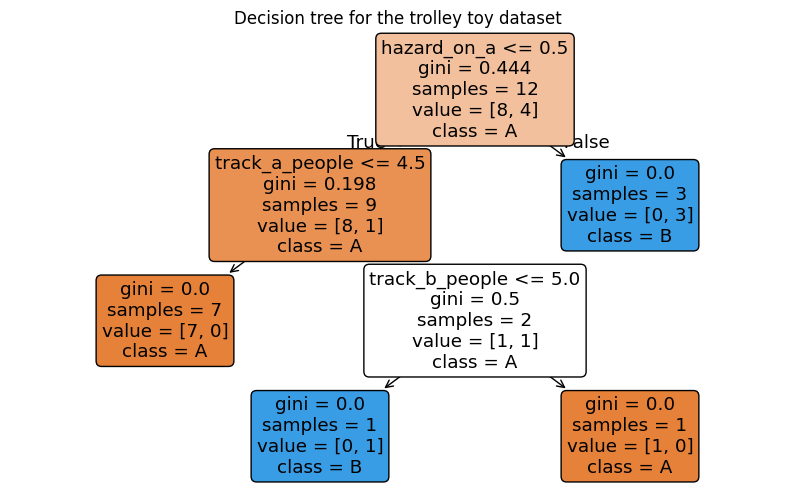

In [8]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(10, 6))
tree.plot_tree(
    trolley_tree,
    feature_names=feature_cols,
    class_names=trolley_tree.classes_,
    filled=True,
    rounded=True
)
plt.title("Decision tree for the trolley toy dataset")
plt.show()

### 7. A Slightly Bigger Example (Iris Dataset)

To build confidence, let’s repeat the same workflow on the classic Iris flower dataset included in scikit-learn. The steps—split, train, validate, test—stay the same regardless of dataset size.
The Iris dataset is a classic multivariate dataset containing **150 iris flowers** from **three species**:

- _setosa_ (label `0`)
- _versicolor_ (label `1`)
- _virginica_ (label `2`)

Each row corresponds to a **single flower** and includes **four numeric features** (all in centimeters):

- `sepal length (cm)`
- `sepal width (cm)`
- `petal length (cm)`
- `petal width (cm)`

In scikit-learn, the dataset is provided as a `Bunch` object with:

- `data`: a `(150, 4)` feature matrix (`X_iris`)
- `target`: a length‑150 vector of integer labels (`y_iris`)
- `feature_names`: list of the four feature names
- `target_names`: array mapping `0, 1, 2` → `"setosa"`, `"versicolor"`, `"virginica"`

In this notebook, we:

- Built a **scatter-matrix** (`fig`) to visualize how the three species separate across pairs of features.
- Split the data into **train**, **validation**, and **test** sets (`X_train_i`, `X_val_i`, `X_test_i`, etc.).
- Trained a **DecisionTreeClassifier** (`iris_tree`) and evaluated it with accuracy on each split.
- Computed a **confusion matrix** (`iris_cm`) to see how well the model distinguishes the three species; the current tree achieves **near-perfect (in our run, perfect) accuracy** on the test set.

Because it is small, clean, and well-behaved (no missing values, balanced classes, simple numeric features), the Iris dataset is ideal for practicing supervised learning workflows: **split → train → validate → test**, interpreting decision trees, and comparing different classifiers.


In [9]:
import plotly.express as px
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
X_iris = iris.data
y_iris = iris.target

iris_df = iris.frame.copy()
iris_df["species"] = iris_df["target"].map(lambda idx: iris.target_names[idx])

fig = px.scatter_matrix(
  iris_df,
  dimensions=iris.feature_names,
  color="species",
  title="Iris dataset feature relationships",
  labels={col: col.replace(" (cm)", "") for col in iris.feature_names}
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [10]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
X_iris = iris.data
y_iris = iris.target

X_train_i, X_temp_i, y_train_i, y_temp_i = train_test_split(
    X_iris, y_iris, test_size=0.4, random_state=0, stratify=y_iris
)
X_val_i, X_test_i, y_val_i, y_test_i = train_test_split(
    X_temp_i, y_temp_i, test_size=0.5, random_state=0, stratify=y_temp_i
)

iris_tree = DecisionTreeClassifier(random_state=0, max_depth=3)
iris_tree.fit(X_train_i, y_train_i)

iris_train_acc = accuracy_score(y_train_i, iris_tree.predict(X_train_i))
iris_val_acc = accuracy_score(y_val_i, iris_tree.predict(X_val_i))
iris_test_acc = accuracy_score(y_test_i, iris_tree.predict(X_test_i))

pd.DataFrame(
    {
        "Split": ["Train", "Validation", "Test"],
        "Accuracy": [iris_train_acc, iris_val_acc, iris_test_acc]
    }
)

,Split,Accuracy
0,Train,0.977778
1,Validation,0.966667
2,Test,1.000000


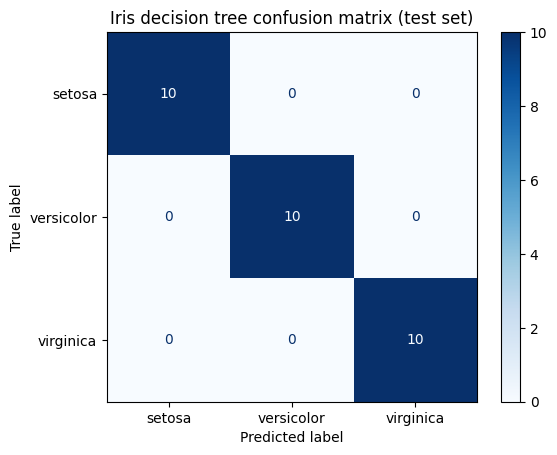

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

iris_cm = confusion_matrix(y_test_i, iris_tree.predict(X_test_i))
disp = ConfusionMatrixDisplay(
    confusion_matrix=iris_cm, display_labels=iris.target_names
)
disp.plot(cmap="Blues")
plt.title("Iris decision tree confusion matrix (test set)")
plt.show()

### 9. Mini-Assignment

1. Add 1–2 new features to the trolley dataset (ideas: `is_night`, `has_obstacle_on_b`) and briefly justify how they could influence a decision. Re-train the tree and describe any changes you observe.
2. Re-train the decision tree with at least two different `max_depth` values (e.g., 2 vs. 5) and compare validation accuracy. Which depth would you keep and why?
3. In 3–5 sentences, explain why we keep the test set untouched until the end and what could go wrong if we peek at it early.

**Stretch goal:** Try a different classifier (e.g., logistic regression) on the trolley data and compare its validation/test accuracy with the tree.
